## Machine Learning : Theory and Applications (2025/26)
Simona Cocco & Vito Dichio

[✉ simona.cocco@phys.ens.fr](mailto:simona.cocco@phys.ens.fr) \\
[✉ vito.dichio@phys.ens.fr](mailto:vito.dichio@phys.ens.fr)


#### Bibliography:
[1] Cocco et al., *From Statistical Physics to Data-Driven Modelling: with Applications to Quantitative Biology*, Oxford University Press (2022)

[2] de Ruyter van Steveninck et al., *Reproducibility and Variability in Neural Spike Trains*, Science 275, 1805–1808 (1997)

[3] Koch et al., *Efficiency of Information Transmission by Retinal Ganglion Cells*, Current Biology 14, 1523–1530 (2004)

[4] Schneidman et al., *Weak pairwise correlations imply strongly correlated network states in a neural population*, Nature 440, 7087 (2006)

[5] Cover & Thomas, *Elements of information theory*. John Wiley & Sons (1999)

# ML for Neuroscience — Tutorial 2 (SOLUTION)

**Topic:** Entropy and information in neural spike trains

**Goals**
- Define and compute entropy for discrete distributions (in bits)
- Bin spike trains and encode responses as binary words
- Estimate *total entropy* and *noise entropy* and mutual information 

**Note** / The present notebook is based on the *Tutorial 2: entropy and information in neural spike trains* in [1], Section 2.4. An additional general reference for the mathematical background is also [5], Chapter 2.

## Part A - Entropy of a Poisson spike train

Consider a single neuron whose spikes follow a Poisson process with constant rate $\theta$.  Let $N$ be the random variable denoting the number of spikes observed in a time window of length $T$.  Then $N$ is Poisson-distributed (see Tutorial 1):

$$
P_N(n \mid \lambda) = \Pr[N = n \mid \lambda]
= \frac{\lambda^k e^{-\lambda}}{k!}, \quad k=0,1,2,\dots
$$

where $\lambda = \theta T$ is the **expected number of spikes** in the window.

To analyze the spike train in a way that connects to information-theoretic quantities, we discretize the continuous time axis into non-overlapping bins of length $\Delta t$.

#### 🎯 Question A1.
Let $\sigma \in \{0,1\}$ be the binary random variable defined for each bin of length $\Delta t$ as follows: $\sigma=0$ if there are no spikes in the bin, $\sigma=1$ if there is **at least** one spike. This coarse-graining reduces the spike train to a binary sequence, which we can now analyze in terms of information content.

Compute analytically:

(i) the probability distribution $P_\sigma$ as functions of $\theta$ and $\Delta t$. 

(ii) the entropy $S(P_{\sigma})$ of the binary distribution $P_{\sigma}$ and the entropy rate $S(P_{\sigma})/\Delta t$ (in bits per second)


#### Solution A1.

(i) The random variable $\sigma$ can take two values: 0 (no spikes in the bin) and 1 (at least one spike in the bin). The probabilities are:

$P_{\sigma}(0) = P_N(0 | \lambda) = e^{- \lambda}\ ,$

$P_{\sigma}(1) = 1 - P_N(0 |  \lambda) = 1 - e^{- \lambda}\ ,$

where $\lambda = \theta \Delta t$ is the expected number of spikes in the bin of length $\Delta t$.

(ii) By definition, the entropy of a discrete distribution $P_{\sigma}$ is
$$ S(P_{\sigma}) = -  P_{\sigma}(0) \log P_{\sigma}(0) -P_{\sigma}(1) \log P_{\sigma}(1) = \theta \Delta t  e^{-  \theta \Delta t} - (1-e^{-  \theta \Delta t})\log(1-e^{-  \theta \Delta t})$$
The entropy rate is the same as above, divided by $\Delta t$.




#### 🎯 Question A2.
Plot the entropy and entropy rate as functions of $\Delta t$, for $\theta = 2$ Hz, $4$ Hz, $8$ Hz.


findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

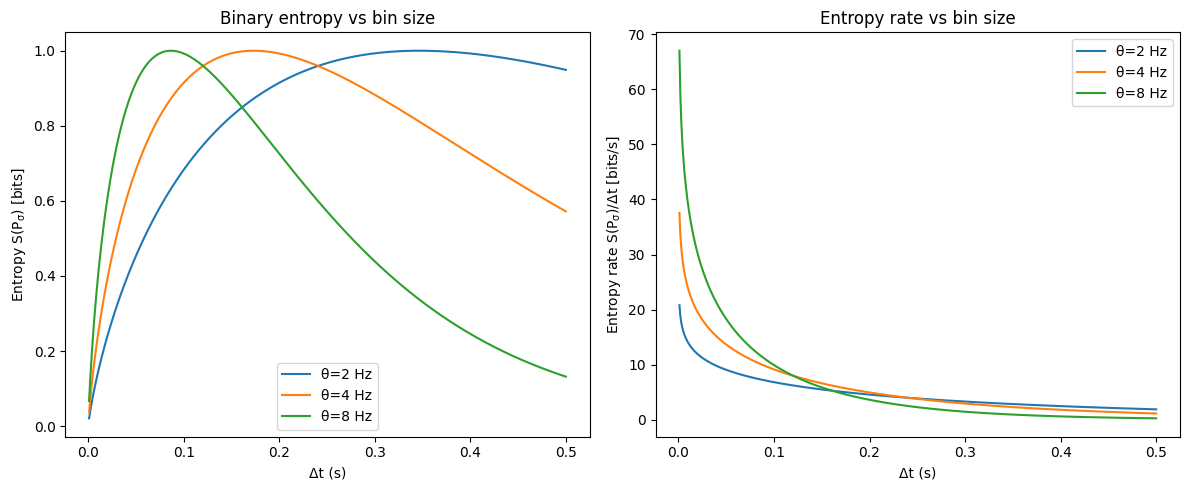

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


def xlogx(x):
    """Safe computation of x log(x), using scipy.special.xlogy to handle x=0."""
    return scipy.special.xlogy(x, x)


def binary_entropy(p):
    """Binary (Bernouilli) entropy in bits."""
    S = -xlogx(p) - xlogx(1 - p)
    return S / np.log(2)  # convert from nats to bits


def S_P_sigma(theta, dt):
    """
    Entropy S(P_sigma) in bits for a Poisson process binarized per bin.
    - Vectorized: works if theta or dt are scalars or arrays.
    - For each bin,  the entropy of a binarised Poisson process equals Bernoulli entropy with p = 1 - exp(-theta * dt).
    """
    ps = 1 - np.exp(-theta * dt)  # P(sigma=1)
    return binary_entropy(ps)


def plot_entropy_vs_dt(thetas, dts):
    """
    Plot entropy and entropy rate vs bin size for a list of firing rates.
    """
    plt.figure(figsize=(12,5))

    # (i) Entropy S(P_sigma)
    plt.subplot(1,2,1)
    for theta in thetas:
        S =  S_P_sigma(theta, dts)
        plt.plot(dts, S, label=f"θ={theta} Hz")

    plt.xlabel("Δt (s)")
    plt.ylabel(r"Entropy $S(P_\sigma)$ [bits]")
    plt.title("Binary entropy vs bin size")
    plt.legend()

    # (ii) Entropy rate S(P_sigma)/Δt
    plt.subplot(1,2,2)
    for theta in thetas:
        ps = 1 - np.exp(-theta * dts)
        H = binary_entropy(ps) / dts
        plt.plot(dts, H, label=f"θ={theta} Hz")
    plt.xlabel("Δt (s)")
    plt.ylabel(r"Entropy rate $S(P_\sigma)/\Delta t$ [bits/s]")
    plt.title("Entropy rate vs bin size")
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- parameters ---
thetas = [2, 4, 8]  # Hz
dts = np.linspace(1e-3, 0.5, 500)  # bin sizes from 1 ms to 0.5 s

plot_entropy_vs_dt(thetas, dts)